In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
 
import sklearn as sns
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.stats import skew, kurtosis


%matplotlib inline

In [188]:
#import data into python
pd.read_csv('C:\\Users\\Amy Moore\\Documents\\Poverty Data new.csv')
poverty_data = pd.read_csv('C:\\Users\\Amy Moore\\Documents\\Poverty Data new.csv')


In [189]:
poverty_data

,row_id,area__urban_influence,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,...,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_diabetes,health__pct_physical_inacticity,yr,row_id.1,poverty_rate
0,0,Noncore adjacent to a large metro area,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,...,0.273092,0.157631,10,11,0.345,0.159,0.317,b,0,22.6
1,2,Micropolitan adjacent to a large metro area,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,...,0.235933,0.165844,12,11,0.296,0.123,0.350,b,2,17.3
2,4,Noncore adjacent to micro area and contains a ...,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,...,0.315789,0.138034,10,11,0.267,0.092,0.259,b,4,24.4
3,5,Noncore adjacent to micro area and contains a ...,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,...,0.349398,0.170683,7,13,0.272,0.084,0.249,b,5,16.4
4,8,Large-in a metro area with at least 1 million ...,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,...,0.190335,0.371795,15,6,0.232,0.080,0.253,a,8,17.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193,6270,Small-in a metro area with fewer than 1 millio...,0.391,0.079,0.279,0.099,0.499,0.256,0.144,0.588,...,0.330979,0.164480,11,8,0.278,0.082,0.247,b,6270,24.8
3194,6273,Noncore adjacent to a small metro and does not...,0.344,0.117,0.302,0.104,0.511,0.197,0.215,0.015,...,0.152594,0.102747,9,14,0.349,0.160,0.339,b,6273,31.6
3195,6275,Large-in a metro area with at least 1 million ...,0.458,0.044,0.162,0.060,0.474,0.230,0.154,0.011,...,0.266467,0.168663,11,9,0.351,0.117,0.318,a,6275,12.1
3196,6276,Noncore not adjacent to a metro/micro area and...,0.549,0.023,0.217,0.100,0.504,0.195,0.275,0.014,...,0.332000,0.183000,6,15,0.307,0.080,0.303,b,6276,14.1


In [190]:
poverty_data.head()

,row_id,area__urban_influence,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,...,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_diabetes,health__pct_physical_inacticity,yr,row_id.1,poverty_rate
0,0,Noncore adjacent to a large metro area,0.358,0.089,0.253,0.099,0.494,0.200,0.195,0.044,...,0.273092,0.157631,10,11,0.345,0.159,0.317,b,0,22.6
1,2,Micropolitan adjacent to a large metro area,0.503,0.057,0.171,0.065,0.503,0.243,0.166,0.017,...,0.235933,0.165844,12,11,0.296,0.123,0.350,b,2,17.3
2,4,Noncore adjacent to micro area and contains a ...,0.471,0.070,0.297,0.122,0.497,0.250,0.178,0.554,...,0.315789,0.138034,10,11,0.267,0.092,0.259,b,4,24.4
3,5,Noncore adjacent to micro area and contains a ...,0.578,0.049,0.231,0.107,0.474,0.194,0.196,0.031,...,0.349398,0.170683,7,13,0.272,0.084,0.249,b,5,16.4
4,8,Large-in a metro area with at least 1 million ...,0.530,0.046,0.262,0.067,0.513,0.206,0.101,0.433,...,0.190335,0.371795,15,6,0.232,0.080,0.253,a,8,17.4


In [191]:
poverty_data.dtypes

row_id                                                int64
area__urban_influence                                object
econ__pct_civilian_labor                            float64
econ__pct_unemployment                              float64
econ__pct_uninsured_adults                          float64
econ__pct_uninsured_children                        float64
demo__pct_female                                    float64
demo__pct_below_18_years_of_age                     float64
demo__pct_aged_65_years_and_older                   float64
demo__pct_hispanic                                  float64
demo__pct_non_hispanic_african_american             float64
demo__pct_non_hispanic_white                        float64
demo__pct_american_indian_or_alaskan_native         float64
demo__pct_asian                                     float64
demo__pct_adults_less_than_a_high_school_diploma    float64
demo__pct_adults_with_high_school_diploma           float64
demo__pct_adults_with_some_college      

In [192]:
#check for missing values
poverty_data.isna().any()
poverty_data.drop(['area__urban_influence','yr'], axis =1 , inplace =True)

In [193]:
#drop missing values
poverty_data= poverty_data.dropna()


In [194]:
# check for missing values again
poverty_data.isna().any()

row_id                                              False
econ__pct_civilian_labor                            False
econ__pct_unemployment                              False
econ__pct_uninsured_adults                          False
econ__pct_uninsured_children                        False
demo__pct_female                                    False
demo__pct_below_18_years_of_age                     False
demo__pct_aged_65_years_and_older                   False
demo__pct_hispanic                                  False
demo__pct_non_hispanic_african_american             False
demo__pct_non_hispanic_white                        False
demo__pct_american_indian_or_alaskan_native         False
demo__pct_asian                                     False
demo__pct_adults_less_than_a_high_school_diploma    False
demo__pct_adults_with_high_school_diploma           False
demo__pct_adults_with_some_college                  False
demo__pct_adults_bachelors_or_higher                False
demo__birth_ra

In [195]:
#assign data
x = poverty_data.drop('poverty_rate', axis=1)
y= poverty_data['poverty_rate']

In [196]:
poverty_data.corr()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_diabetes,health__pct_physical_inacticity,row_id.1,poverty_rate
row_id,1.000000,-0.001213,0.001838,-0.013847,-0.006575,-0.016031,-0.027395,-0.003917,-0.015246,-0.000851,...,0.012784,0.000028,-0.008431,-0.016324,-0.008318,-0.009094,-0.012810,-0.012804,1.000000,-0.011626
econ__pct_civilian_labor,-0.001213,1.000000,-0.623788,-0.409326,-0.032743,0.110623,-0.011560,0.001866,0.008591,-0.342347,...,-0.224914,0.240842,0.433434,-0.001571,-0.276816,-0.367823,-0.506662,-0.345175,-0.001213,-0.669521
econ__pct_unemployment,0.001838,-0.623788,1.000000,0.266780,-0.107916,0.063609,-0.000772,-0.046579,-0.025786,0.376259,...,0.188403,-0.225308,-0.338338,-0.012369,0.200550,0.286645,0.414064,0.223401,0.001838,0.597179
econ__pct_uninsured_adults,-0.013847,-0.409326,0.266780,1.000000,0.719694,-0.075633,0.279862,-0.078382,0.477774,0.206077,...,0.029098,-0.237498,-0.391274,0.284247,0.058177,0.177636,0.292418,0.285880,-0.013847,0.541712
econ__pct_uninsured_children,-0.006575,-0.032743,-0.107916,0.719694,1.000000,-0.204232,0.188703,0.084926,0.441007,-0.099845,...,-0.080675,0.039682,-0.177605,0.160070,-0.046424,-0.129381,-0.051511,0.014852,-0.006575,0.098882
demo__pct_female,-0.016031,0.110623,0.063609,-0.075633,-0.204232,1.000000,0.200632,0.105052,-0.159427,0.098705,...,-0.107055,0.009107,0.179561,0.107528,0.181190,0.038159,0.180424,0.067711,-0.016031,-0.068065
demo__pct_below_18_years_of_age,-0.027395,-0.011560,-0.000772,0.279862,0.188703,0.200632,1.000000,-0.567257,0.320997,0.022138,...,-0.119474,0.038302,-0.095612,0.730600,-0.301832,0.169384,-0.045078,0.062291,-0.027395,0.039237
demo__pct_aged_65_years_and_older,-0.003917,0.001866,-0.046579,-0.078382,0.084926,0.105052,-0.567257,1.000000,-0.242164,-0.227269,...,0.308320,0.136666,-0.216247,-0.519969,0.638889,-0.038411,0.217284,0.163352,-0.003917,-0.088123
demo__pct_hispanic,-0.015246,0.008591,-0.025786,0.477774,0.441007,-0.159427,0.320997,-0.242164,1.000000,-0.103334,...,-0.321523,-0.099648,-0.021497,0.304578,-0.296858,-0.247101,-0.258173,-0.212202,-0.015246,0.105574
demo__pct_non_hispanic_african_american,-0.000851,-0.342347,0.376259,0.206077,-0.099845,0.098705,0.022138,-0.227269,-0.103334,1.000000,...,-0.045628,-0.253325,-0.085150,0.066987,0.027813,0.410282,0.488848,0.256655,-0.000851,0.507048


In [197]:
# describe the data
poverty_data.describe()

,row_id,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,...,demo__pct_adults_with_high_school_diploma,demo__pct_adults_with_some_college,demo__pct_adults_bachelors_or_higher,demo__birth_rate_per_1k,demo__death_rate_per_1k,health__pct_adult_obesity,health__pct_diabetes,health__pct_physical_inacticity,row_id.1,poverty_rate
count,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,...,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000
mean,3157.617021,0.466879,0.059575,0.217534,0.085920,0.498781,0.227763,0.170137,0.090233,0.091117,...,0.350338,0.301351,0.199439,11.678348,10.306946,0.307599,0.109287,0.277309,3157.617021,16.825845
std,1823.783904,0.074169,0.022813,0.067372,0.040005,0.024251,0.034291,0.043594,0.142707,0.147104,...,0.070539,0.052511,0.089093,2.739575,2.777164,0.043404,0.023197,0.052947,1823.783904,6.690998
min,0.000000,0.217000,0.008000,0.046000,0.009000,0.294000,0.098000,0.043000,0.000000,0.000000,...,0.072821,0.112821,0.013986,4.000000,0.000000,0.140000,0.033000,0.097000,0.000000,3.100000
25%,1563.250000,0.419750,0.044000,0.166000,0.057000,0.493000,0.207000,0.142000,0.019000,0.006000,...,0.306011,0.265347,0.138826,10.000000,8.000000,0.284000,0.094000,0.243000,1563.250000,12.000000
50%,3199.500000,0.467000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,...,0.355735,0.301547,0.177241,11.000000,10.000000,0.309000,0.109000,0.280000,3199.500000,15.800000
75%,4724.250000,0.514000,0.071000,0.262000,0.105000,0.512000,0.245250,0.194000,0.088000,0.096250,...,0.399247,0.335976,0.233183,13.000000,12.000000,0.334000,0.124000,0.313000,4724.250000,20.300000
max,6277.000000,1.000000,0.240000,0.495000,0.285000,0.576000,0.417000,0.355000,0.945000,0.855000,...,0.551689,0.474216,0.794872,29.000000,27.000000,0.484000,0.197000,0.443000,6277.000000,47.400000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E006BDF888>,
      dtype=object)

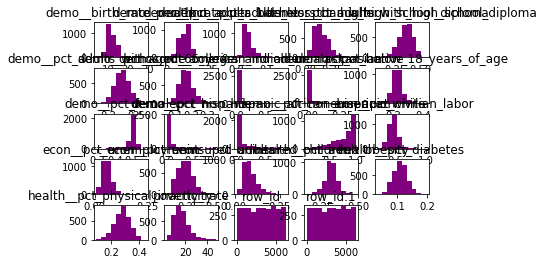

In [198]:
# make histogram
poverty_data.hist(grid= False, color = 'purple')

In [199]:
# Train and test data
X_train, x_test, y_train, y_test= train_test_split(x,y,test_size =20, random_state =1)

In [201]:
regression_model=GradientBoostingRegressor()
regression_model.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [202]:
regression_model.score(X_train,y_train)
y_predict = regression_model.predict(x_test)

In [203]:
mae= mean_absolute_error(y_test,y_predict)

In [204]:
mae

2.6568535762398358